In [64]:
% matplotlib inline

import scipy.io
import numpy as np
from sklearn import decomposition
from matplotlib import pyplot
from matplotlib.pyplot import imshow

from L7.face_recognition import FaceRecognition
from L5.knn import KNN
from L7.pca import PCA

In [67]:
training_images = scipy.io.loadmat('L7/data/ReducedImagesForTraining.mat')["images"].T
testing_images = scipy.io.loadmat('L7/data/ReducedImagesForTesting.mat')["images"].T
print(training_images.shape, testing_images.shape)
training_images_standardized = PCA.standardize(training_images)
testing_images_standardized = PCA.standardize(testing_images)

(250, 4920) (100, 4920)


In [68]:
pca = decomposition.PCA()
pca.fit(training_images)
training_images_pca = pca.transform(training_images)
testing_images_pca = pca.transform(testing_images)
print(training_images_pca.shape, testing_images_pca.shape)

(250, 250) (100, 250)


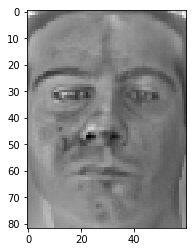

In [69]:
image = testing_images_standardized[0]
image_reshaped = image.reshape([60, 82]).T
imshow(image_reshaped, cmap="gray")

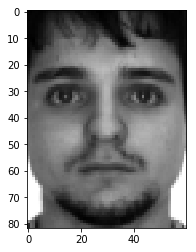

In [70]:
image = training_images[5]
image_reshaped = image.reshape([60, 82]).T
imshow(image_reshaped, cmap="gray")

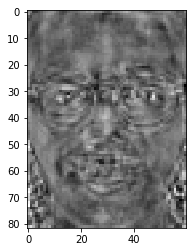

In [71]:
pca = decomposition.PCA(n_components=250)
pca.fit(training_images)
training_images_pca = pca.transform(training_images_standardized)
testing_images_pca = pca.transform(testing_images_standardized)
image = training_images_pca[5]
image_depca = pca.inverse_transform(image)
image_reshaped = image_depca.reshape([60, 82]).T
imshow(image_reshaped, cmap="gray")

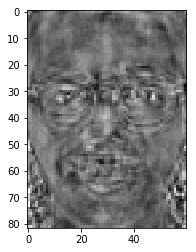

In [72]:
image = testing_images_pca[2]
image_depca = pca.inverse_transform(image)
image_reshaped = image_depca.reshape([60, 82]).T
imshow(image_reshaped, cmap="gray")

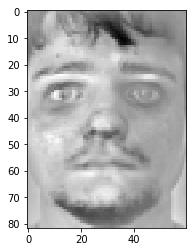

In [73]:
image = testing_images_standardized[2]
image_reshaped = image.reshape([60, 82]).T
imshow(image_reshaped, cmap="gray")

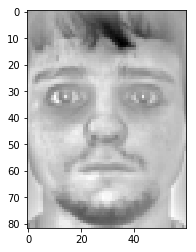

In [74]:
image = training_images_standardized[5]
image_reshaped = image.reshape([60, 82]).T
imshow(image_reshaped, cmap="gray")

In [75]:
training_targets = np.array([i // 5 for i in range(250)])
testing_targets = np.array([i // 2 for i in range(100)])

In [76]:
face_recognition = FaceRecognition()
face_recognition.fit(training_images_pca)

In [77]:
face_recognition.predict(testing_images_pca)

array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 21, 25,
       25, 26, 26, 27, 27, 28, 28, 29, 29, 13, 30, 31, 31, 32, 32, 33, 14,
       34, 13, 35, 22, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42,
       42, 43, 43, 44, 44, 45, 45, 46,  6, 47, 47, 48, 48, 49, 49])

In [78]:
face_recognition.print_results(testing_images_pca)

pred. id	eucl. distance	pr. pers.	pers.	correct	test id.
1	2203	0	0	True	0
1	2299	0	0	True	1
6	7072	1	1	True	2
9	9352	1	1	True	3
10	11320	2	2	True	4
10	9422	2	2	True	5
15	8060	3	3	True	6
19	6218	3	3	True	7
22	11998	4	4	True	8
24	14865	4	4	True	9
26	4616	5	5	True	10
29	6241	5	5	True	11
32	4062	6	6	True	12
34	3779	6	6	True	13
35	26561	7	7	True	14
39	6752	7	7	True	15
40	7781	8	8	True	16
44	12648	8	8	True	17
47	5868	9	9	True	18
49	5673	9	9	True	19
52	5039	10	10	True	20
54	13940	10	10	True	21
55	5245	11	11	True	22
59	11510	11	11	True	23
60	8557	12	12	True	24
64	5301	12	12	True	25
65	12539	13	13	True	26
69	8869	13	13	True	27
70	6496	14	14	True	28
74	7424	14	14	True	29
77	4462	15	15	True	30
79	6607	15	15	True	31
80	3012	16	16	True	32
84	7746	16	16	True	33
85	17822	17	17	True	34
89	9164	17	17	True	35
90	9203	18	18	True	36
94	14574	18	18	True	37
97	6718	19	19	True	38
99	7043	19	19	True	39
102	2613	20	20	True	40
104	8372	20	20	True	41
107	6274	21	21	True	42
109	12131	21	21	True	43
110	17525	22	2

In [79]:
face_recognition.score(testing_images_pca)

0.93999999999999995

In [80]:
pca = decomposition.PCA(n_components=100)
pca.fit(training_images)
training_images_pca = pca.transform(training_images_standardized)
testing_images_pca = pca.transform(testing_images_standardized)
print(training_images_pca.shape, testing_images_pca.shape)

face_recognition = KNN(k=1)
face_recognition.fit(training_images_pca, training_targets)
face_recognition.score(testing_images_pca, testing_targets)

(250, 100) (100, 100)


0.88

In [81]:
pca = decomposition.PCA(n_components=50)
pca.fit(training_images)
training_images_pca = pca.transform(training_images_standardized)
testing_images_pca = pca.transform(testing_images_standardized)
print(training_images_pca.shape, testing_images_pca.shape)

face_recognition = FaceRecognition()
face_recognition.fit(training_images_pca)
face_recognition.score(testing_images_pca)

(250, 50) (100, 50)


0.89000000000000001

In [82]:
pca = decomposition.PCA(n_components=30)
pca.fit(training_images)
training_images_pca = pca.transform(training_images_standardized)
testing_images_pca = pca.transform(testing_images_standardized)
print(training_images_pca.shape, testing_images_pca.shape)

face_recognition = FaceRecognition()
face_recognition.fit(training_images_pca)
face_recognition.score(testing_images_pca)

(250, 30) (100, 30)


0.80000000000000004